In [847]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
 
df = pd.read_csv("loansEDA.csv")
df.info()
df.columns
df.describe()
df.shape

<class 'pandas.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    str    
 1   Gender             957 non-null    str    
 2   Married            978 non-null    str    
 3   Dependents         956 non-null    str    
 4   Education          981 non-null    str    
 5   Self_Employed      926 non-null    str    
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    str    
 12  Loan_Status        614 non-null    str    
dtypes: float64(4), int64(1), str(8)
memory usage: 99.8 KB


(981, 13)

<Axes: xlabel='Loan_Status'>

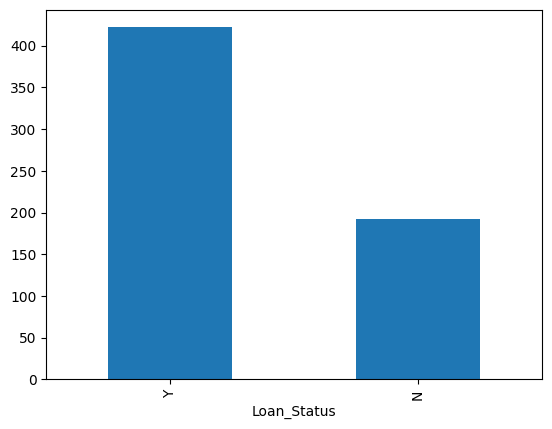

In [848]:
df['Loan_Status'].value_counts()
df['Loan_Status'].value_counts(normalize=True)*100  
df['Loan_Status'].value_counts().plot(kind='bar')

<Axes: >

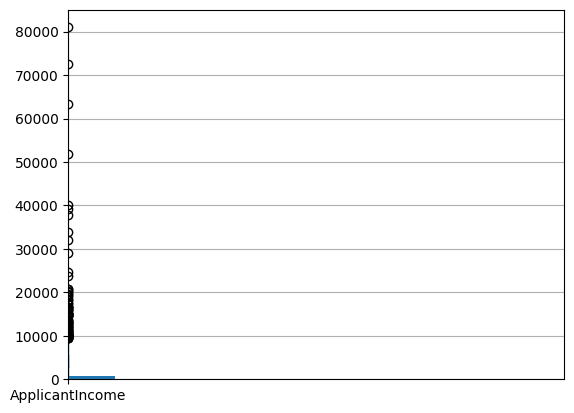

In [849]:
# univariate analysis (one column at a time)
#numerical 
df['ApplicantIncome'].hist()
df.boxplot(column='ApplicantIncome')


<Axes: >

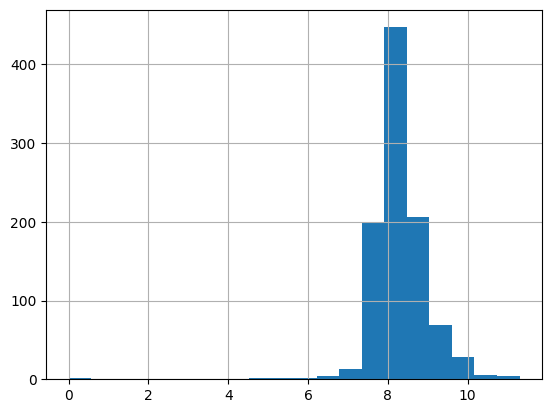

In [850]:
#income is right-skewed - log transform needed
df['ApplicantIncome_log'] = np.log(df['ApplicantIncome']+1)
df['ApplicantIncome_log'].hist(bins=20)



<Axes: xlabel='Gender'>

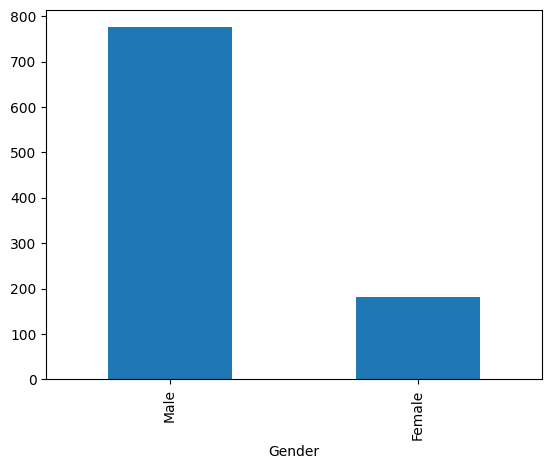

In [851]:
# #categorical
df['Gender'].value_counts().plot.bar()

<Axes: >

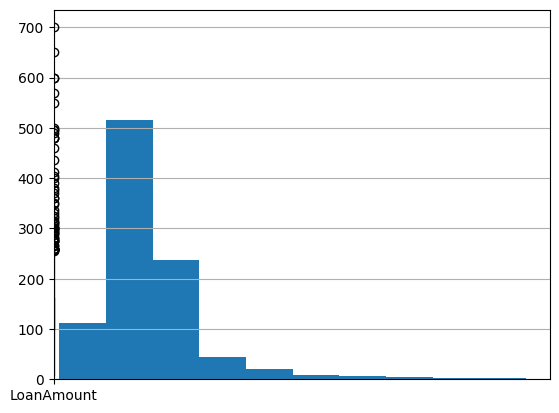

In [852]:
# univariate analysis (one column at a time)
#numerical 
df['LoanAmount'].hist()
df.boxplot(column='LoanAmount')


In [853]:
median_value = df['LoanAmount'].median()
df['LoanAmount'] = df['LoanAmount'].fillna(median_value)

<Axes: >

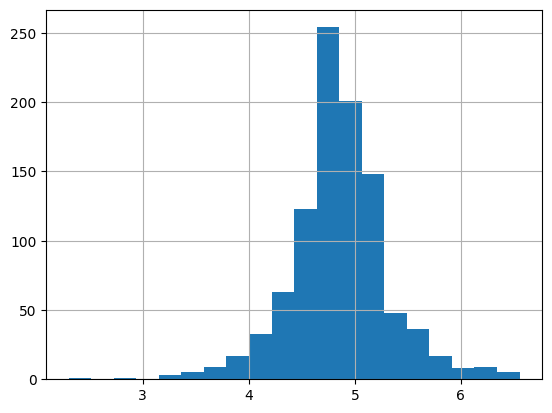

In [854]:
#income is right-skewed - log transform needed
df['LoanAmount_log'] = np.log(df['LoanAmount']+1)
df['LoanAmount_log'].hist(bins=20)



<Axes: xlabel='Gender'>

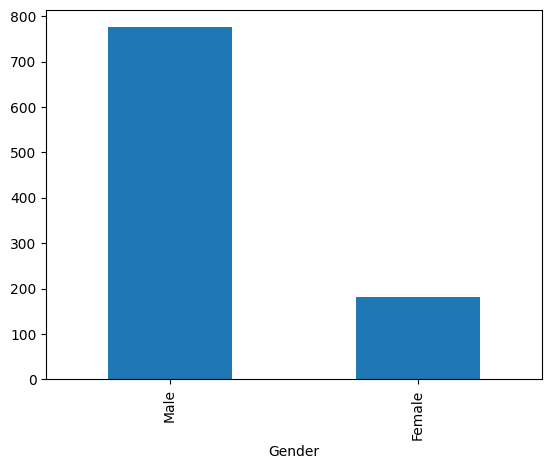

In [855]:
# #categorical
df['Gender'].value_counts().plot.bar()

In [856]:
pd.crosstab(df['Married'],df['Loan_Status'],normalize="index")*100
df["Dependents"] = df["Dependents"].replace("3+", "3")

In [857]:
df["Dependents"] = df["Dependents"].fillna(0)
df["Dependents"].isnull().sum()
df["Credit_History"].isnull().sum()

np.int64(79)

In [858]:
median_value = df["Credit_History"].median()
df["Credit_History"] = df["Credit_History"].fillna(median_value)
df["Credit_History"].isnull().sum()

np.int64(0)

In [859]:
df["ApplicantIncome"].isnull().sum()
median_value = df["ApplicantIncome"].median()
df["ApplicantIncome"] = df["ApplicantIncome"].fillna(median_value)
# df["ApplicantIncome"].isnull().sum()

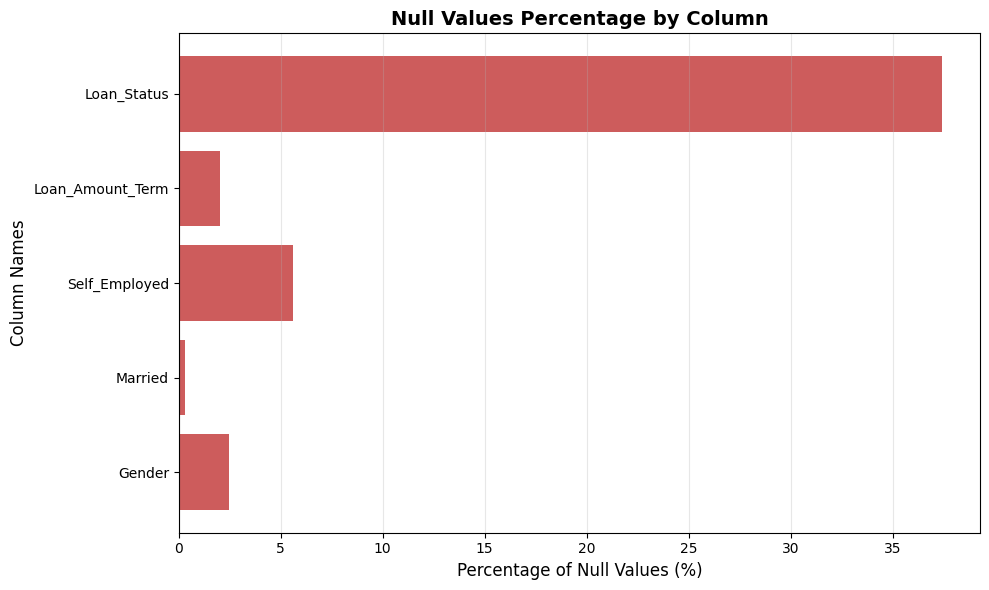

In [860]:
# Visualize null percentage - Horizontal bar chart
null_percentage = (df.isnull().sum() / len(df)) * 100
null_percentage = null_percentage[null_percentage > 0]

if len(null_percentage) > 0:
    plt.figure(figsize=(10, 6))
    plt.barh(null_percentage.index, null_percentage.values, color='indianred')
    plt.xlabel('Percentage of Null Values (%)', fontsize=12)
    plt.ylabel('Column Names', fontsize=12)
    plt.title('Null Values Percentage by Column', fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No null values to display!")

In [861]:
df["CoapplicantIncome"] = df["CoapplicantIncome"].fillna(0)
df["Self_Employed"] = df["Self_Employed"].fillna(0)

In [862]:
median_value = df["CoapplicantIncome"].median()
df["CoapplicantIncome"] = df["CoapplicantIncome"].fillna(median_value)

In [863]:
median_value = df["LoanAmount"].median()
df["LoanAmount"] = df["LoanAmount"].fillna(median_value)

In [864]:
median_value = df["Married"].mode()
df["Married"] = df["Married"].fillna(median_value)

In [865]:
median_value = df["Loan_Amount_Term"].median()
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(median_value)

In [866]:
median_value = df["Self_Employed"].mode()
df["Self_Employed"] = df["Self_Employed"].fillna(median_value)

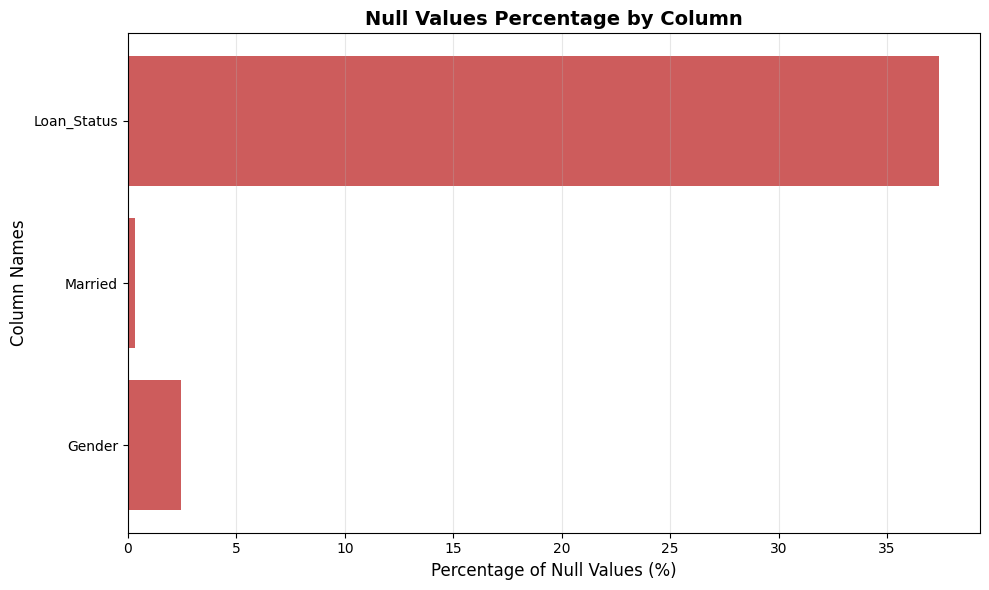

In [867]:
# Visualize null percentage - Horizontal bar chart
null_percentage = (df.isnull().sum() / len(df)) * 100
null_percentage = null_percentage[null_percentage > 0]

if len(null_percentage) > 0:
    plt.figure(figsize=(10, 6))
    plt.barh(null_percentage.index, null_percentage.values, color='indianred')
    plt.xlabel('Percentage of Null Values (%)', fontsize=12)
    plt.ylabel('Column Names', fontsize=12)
    plt.title('Null Values Percentage by Column', fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No null values to display!")

In [868]:
df.info

<bound method DataFrame.info of       Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001002   Male      No          0      Graduate            No   
1    LP001003   Male     Yes          1      Graduate            No   
2    LP001005   Male     Yes          0      Graduate           Yes   
3    LP001006   Male     Yes          0  Not Graduate            No   
4    LP001008   Male      No          0      Graduate            No   
..        ...    ...     ...        ...           ...           ...   
976  LP002971   Male     Yes          3  Not Graduate           Yes   
977  LP002975   Male     Yes          0      Graduate            No   
978  LP002980   Male      No          0      Graduate            No   
979  LP002986   Male     Yes          0      Graduate            No   
980  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0   

In [869]:
df["Self_Employed"] = df["Self_Employed"].replace(0, "Yes")
df['Married'] = df['Married'].replace(np.nan, "Yes")
df["Married"]=df["Married"].fillna(df["Married"].mode())

In [870]:
df['Married'].unique().tolist()


['No', 'Yes']

In [871]:
# Features (all columns except target)
print(df["Married"].unique())
df["Married"]=df["Married"].fillna(df["Married"].mode())
df["Married"] = df["Married"].map({"No": 0, "Yes": 1})
print(df["Married"].unique())


print(df["Self_Employed"].unique())
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].map({"No": 0, "Yes": 1})
print(df["Self_Employed"].unique())

print(df["Education"].unique())
df["Education"]=df["Education"].fillna(df["Education"].mode())
df["Education"] = df["Education"].map({"Not Graduate": 0, "Graduate": 1})
print(df["Education"].unique())

print(df["Property_Area"].unique())
df["Property_Area"]=df["Property_Area"].fillna(df["Property_Area"].mode())
df["Property_Area"] = df["Property_Area"].map({"Urban": 0, "Rural": 1,"Semiurban":2 })
print(df["Property_Area"].unique())

df.fillna({"ApplicantIncome":np.median(df["ApplicantIncome"])})
df.fillna({"CoapplicantIncome":np.median(df["CoapplicantIncome"])},inplace=True)
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median())
df["Credit_History"] = df["Credit_History"].fillna(0)
df["ApplicantIncome_log"]= np.log(df["ApplicantIncome"]+1)
df["CoApplicantIncome_log"]= np.log(df["CoapplicantIncome"]+1)


df.isnull().sum()





<StringArray>
['No', 'Yes']
Length: 2, dtype: str
[0 1]
['No' 'Yes']
[0 1]
<StringArray>
['Graduate', 'Not Graduate']
Length: 2, dtype: str
[1 0]
<StringArray>
['Urban', 'Rural', 'Semiurban']
Length: 3, dtype: str
[0 1 2]


Loan_ID                    0
Gender                    24
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Property_Area              0
Loan_Status              367
ApplicantIncome_log        0
LoanAmount_log             0
CoApplicantIncome_log      0
dtype: int64

In [872]:
train_df=df[df["Loan_Status"].notna()]

test_df= df[df["Loan_Status"].isna()]

print(train_df.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'ApplicantIncome_log', 'LoanAmount_log', 'CoApplicantIncome_log'],
      dtype='str')


In [873]:
df['CoApplicantIncome_log'].max()

np.float64(10.637488727104339)

In [874]:
df[df['CoApplicantIncome_log'].isin([np.inf, -np.inf])]


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,LoanAmount_log,CoApplicantIncome_log


In [875]:
X = train_df[[
    'Married',
    'Education',
    'Self_Employed',
    'ApplicantIncome_log',
    'CoApplicantIncome_log',
    'LoanAmount',
    'Loan_Amount_Term',
    'Credit_History',
    'Property_Area',
    
]]
Y=train_df[['Loan_Status']]
model = LogisticRegression()
model.fit(X,Y)

P1=[1,1,0,3200,np.log(700),np.log(70),360,1,0]
print(model.predict([P1]))

['N']


c:\Users\Administrator\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Administrator\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Administrator\AppData\Local\Programs\Python\Python314\Lib\sit